## EDA Clustering

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.model_selection import learning_curve

from importlib import reload
import wrangle_zillow as wz

pd.options.display.float_format = '{:,.3f}'.format

In [123]:
reload(wz)

<module 'wrangle_zillow' from '/Users/nadina/codeup-data-science/clustering-exercises/wrangle_zillow.py'>

In [124]:
#df = pd.read_csv('clean_zillow.csv')
df = wz.get_zillow()
#df = wz.transform_columns(df)
train, validate, test = wz.split_zillow(df)

In [125]:
df.shape

(50588, 21)

In [126]:
train.head(1)

,sqft,garage_sqft,lot_sqft,age,structure_price,price,land_price,tax_amount,latitude,longitude,...,beds,fireplace,garage,hottub_spa,pool,unit,heating_system,county_land_code,fips,logerror
35466,750,0,5200,68,35480,155984,120504,"2,256.880",33901214,-118053307,...,2,0,0,0,0,1,Floor/Wall,0100,6037,0.018


In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28329 entries, 35466 to 39906
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   sqft              28329 non-null  int64   
 1   garage_sqft       28329 non-null  int64   
 2   lot_sqft          28329 non-null  int64   
 3   age               28329 non-null  int64   
 4   structure_price   28329 non-null  int64   
 5   price             28329 non-null  int64   
 6   land_price        28329 non-null  int64   
 7   tax_amount        28329 non-null  float64 
 8   latitude          28329 non-null  int64   
 9   longitude         28329 non-null  int64   
 10  bath              28329 non-null  category
 11  beds              28329 non-null  category
 12  fireplace         28329 non-null  category
 13  garage            28329 non-null  category
 14  hottub_spa        28329 non-null  category
 15  pool              28329 non-null  category
 16  unit              

In [128]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sqft,"28,329.000","1,907.759",956.422,300.000,"1,272.000","1,658.000","2,291.000","17,245.000"
garage_sqft,"28,329.000",169.624,251.302,0.000,0.000,0.000,430.000,"4,251.000"
lot_sqft,"28,329.000","10,544.011","75,419.153",236.000,"5,579.000","6,825.000","8,686.000","6,971,010.000"
age,"28,329.000",53.557,22.874,1.000,38.000,57.000,67.000,137.000
structure_price,"28,329.000","192,527.323","237,223.457",148.000,"77,074.000","131,275.000","224,000.000","7,507,773.000"
price,"28,329.000","519,443.666","694,176.356","3,254.000","194,062.000","371,362.000","609,122.000","25,381,250.000"
land_price,"28,329.000","326,916.344","515,739.897",161.000,"74,758.000","216,930.000","405,000.000","22,335,500.000"
tax_amount,"28,329.000","6,326.263","8,009.101",51.260,"2,662.700","4,618.910","7,263.100","290,998.060"
latitude,"28,329.000","34,023,519.508","274,457.677","33,341,224.000","33,828,228.000","34,022,848.000","34,188,245.000","34,812,397.000"
longitude,"28,329.000","-118,192,974.607","357,001.700","-119,447,944.000","-118,399,355.000","-118,151,544.000","-117,929,326.000","-117,554,636.000"


In [129]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sqft,"28,329.000",NaN,NaN,NaN,"1,907.759",956.422,300.000,"1,272.000","1,658.000","2,291.000","17,245.000"
garage_sqft,"28,329.000",NaN,NaN,NaN,169.624,251.302,0.000,0.000,0.000,430.000,"4,251.000"
lot_sqft,"28,329.000",NaN,NaN,NaN,"10,544.011","75,419.153",236.000,"5,579.000","6,825.000","8,686.000","6,971,010.000"
age,"28,329.000",NaN,NaN,NaN,53.557,22.874,1.000,38.000,57.000,67.000,137.000
structure_price,"28,329.000",NaN,NaN,NaN,"192,527.323","237,223.457",148.000,"77,074.000","131,275.000","224,000.000","7,507,773.000"
price,"28,329.000",NaN,NaN,NaN,"519,443.666","694,176.356","3,254.000","194,062.000","371,362.000","609,122.000","25,381,250.000"
land_price,"28,329.000",NaN,NaN,NaN,"326,916.344","515,739.897",161.000,"74,758.000","216,930.000","405,000.000","22,335,500.000"
tax_amount,"28,329.000",NaN,NaN,NaN,"6,326.263","8,009.101",51.260,"2,662.700","4,618.910","7,263.100","290,998.060"
latitude,"28,329.000",NaN,NaN,NaN,"34,023,519.508","274,457.677","33,341,224.000","33,828,228.000","34,022,848.000","34,188,245.000","34,812,397.000"
longitude,"28,329.000",NaN,NaN,NaN,"-118,192,974.607","357,001.700","-119,447,944.000","-118,399,355.000","-118,151,544.000","-117,929,326.000","-117,554,636.000"


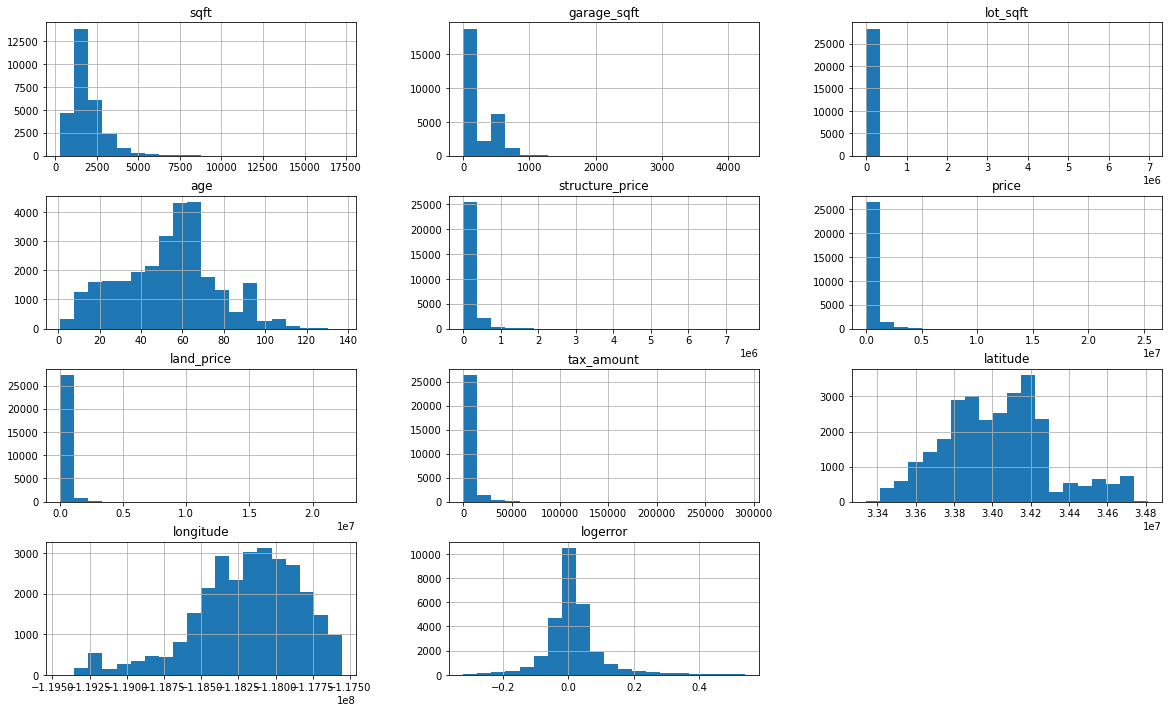

In [130]:
train.hist(bins=20, figsize=(20, 12));

In [111]:
df.logerror.min()

-4.65542037764

In [112]:
df.logerror.max()

5.2629986498

In [115]:
df.shape[0]

51616

In [118]:
q1 = df.logerror.quantile(0.01)
q3 = df.logerror.quantile(0.99)
df = df[(df.logerror > q1) & (df.logerror < q3)]
#((df.logerror > q1) & (df.logerror < q3)).sum()

In [119]:
df.shape[0]

50582

In [120]:
51616 - 50582

1034

<AxesSubplot:>

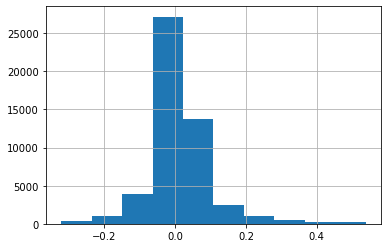

In [121]:
df.logerror.hist()

In [131]:
numerical_columns = train.iloc[:, :10].columns.tolist()
categorical_columns = train.iloc[:, 10:-1].columns.tolist()
target = train.logerror

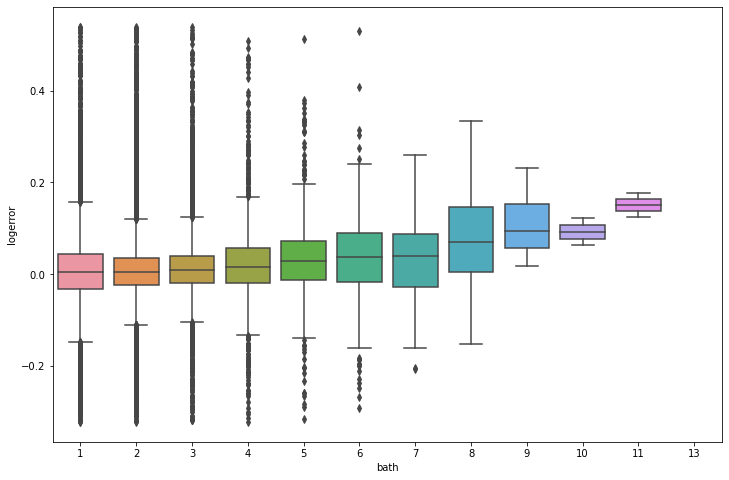

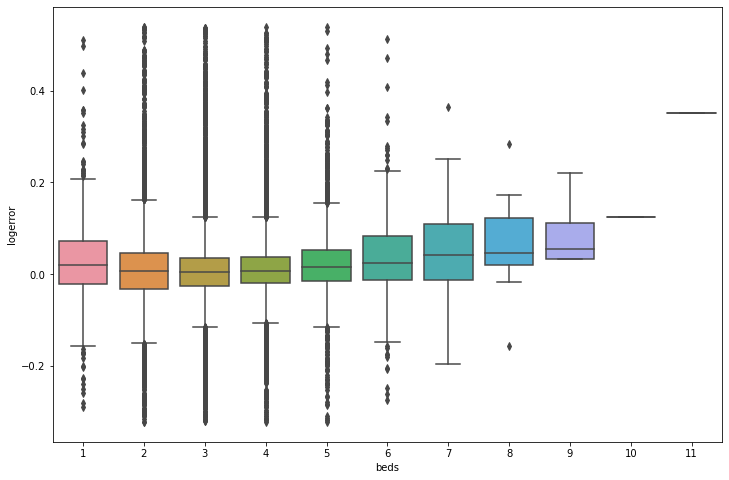

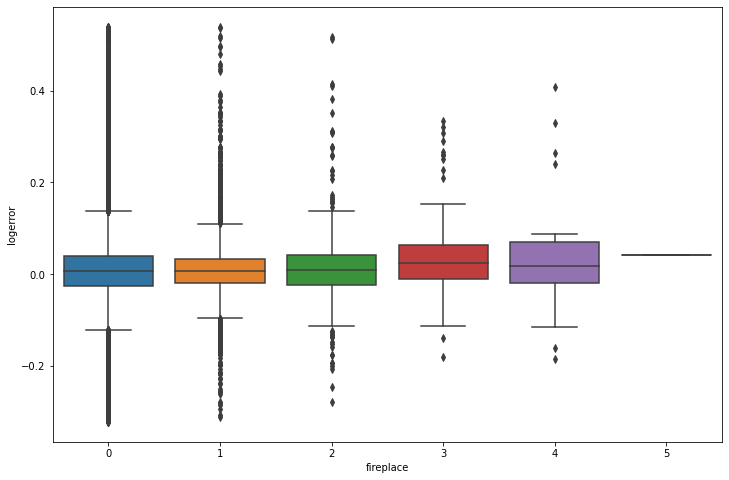

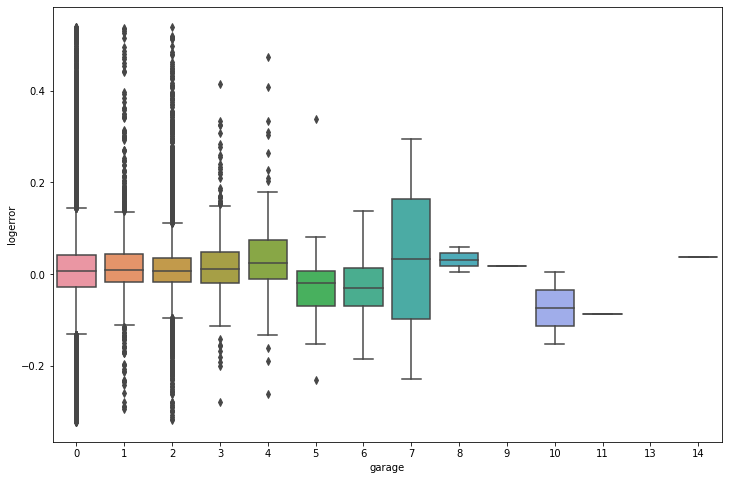

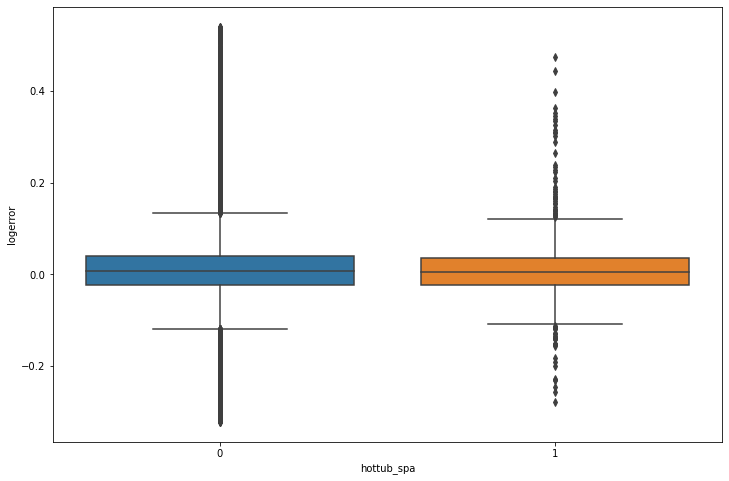

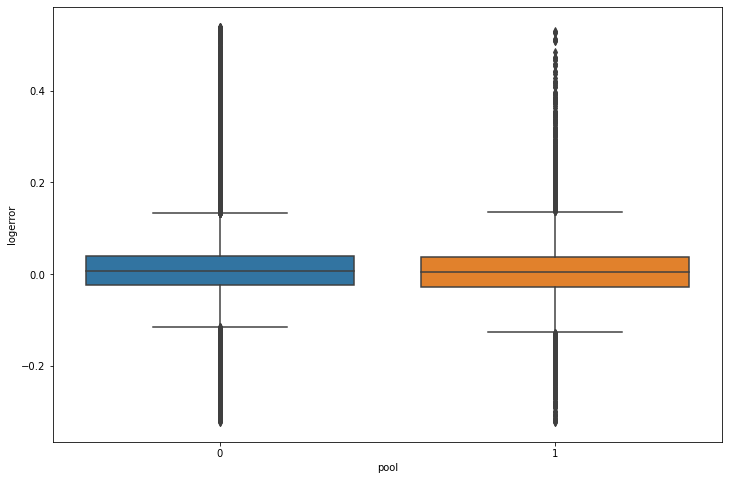

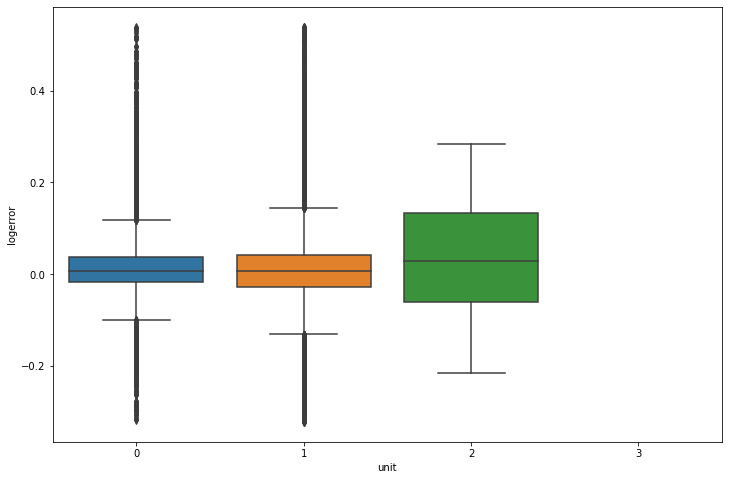

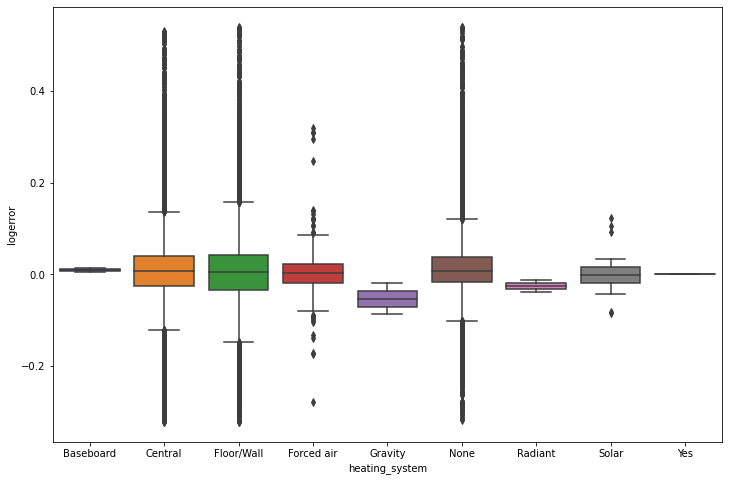

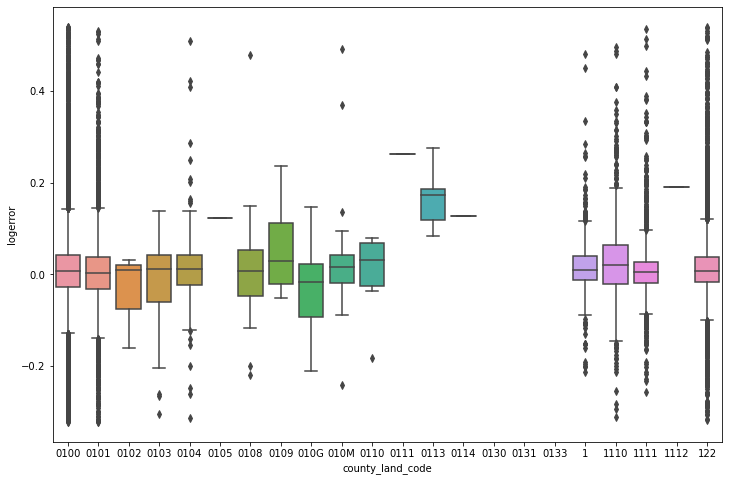

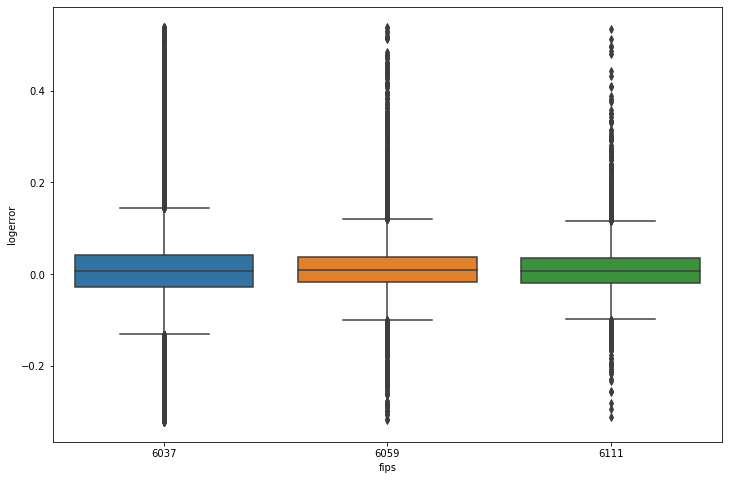

In [133]:
for col in categorical_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=train[col], y=target)
    plt.show()

In [134]:
# boxplot takeaways:

* ```bath``` till 7 almost no changes in ```logerror```
* ```beds```   till 6 almost no changes in   ```logerror```
* ```fireplace``` no changes in target
* ```garage``` till 4 almost equal ```logerror```
* ```hottub_spa``` equal
* ```pool``` equal
* ```unite``` 0, 1 equal, 2 changes, 3 needs to be explored
* ```heating_system``` vary a lot
* ```county_land_code``` vary a lot
* ```fips``` almost equal

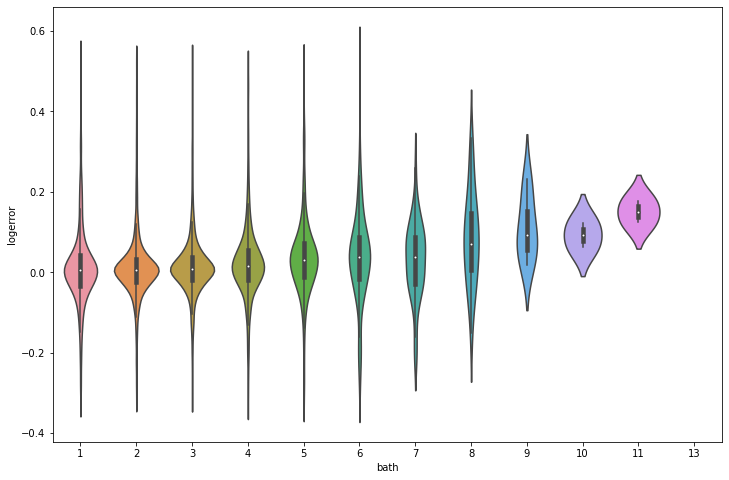

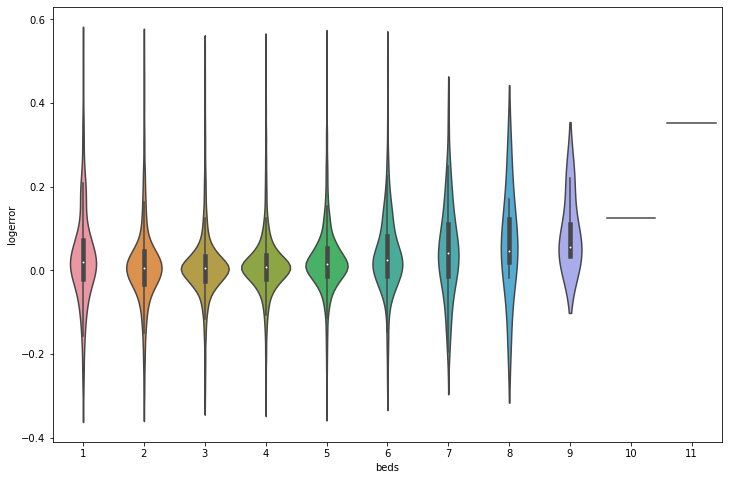

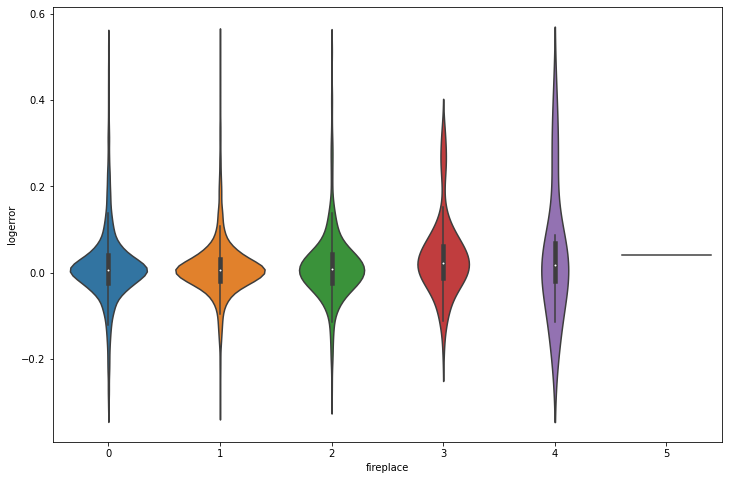

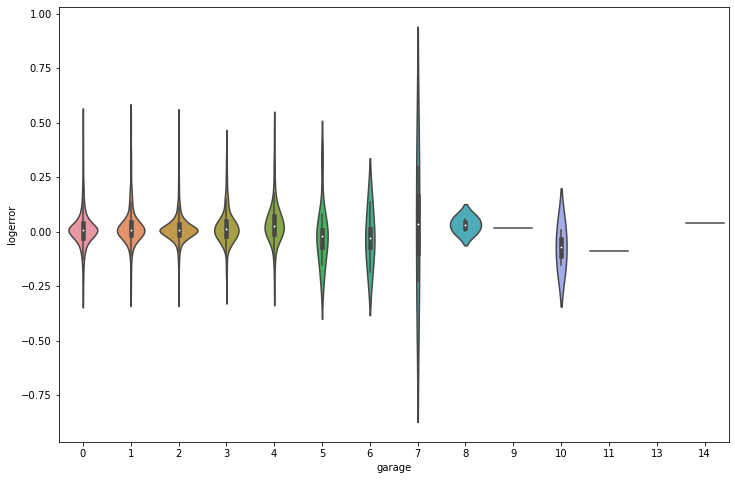

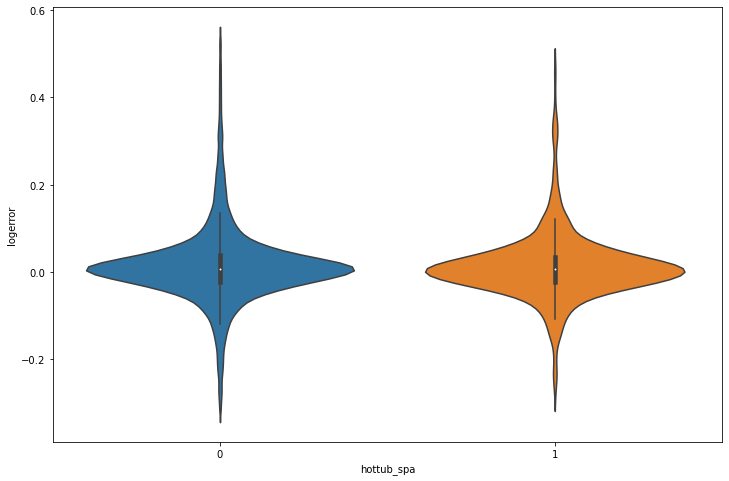

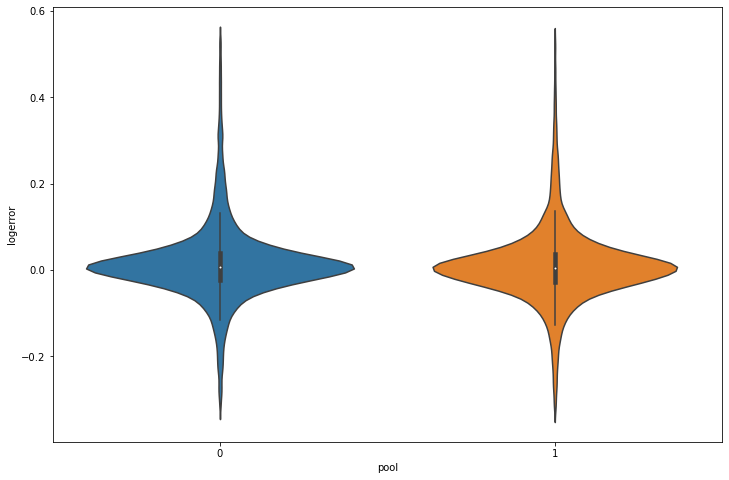

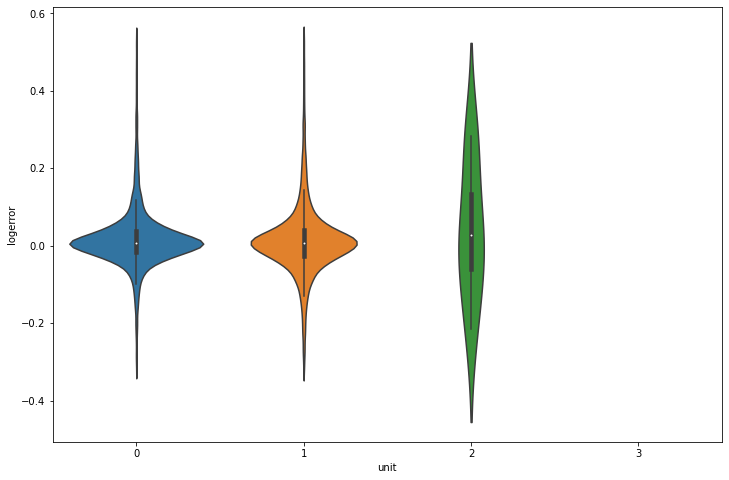

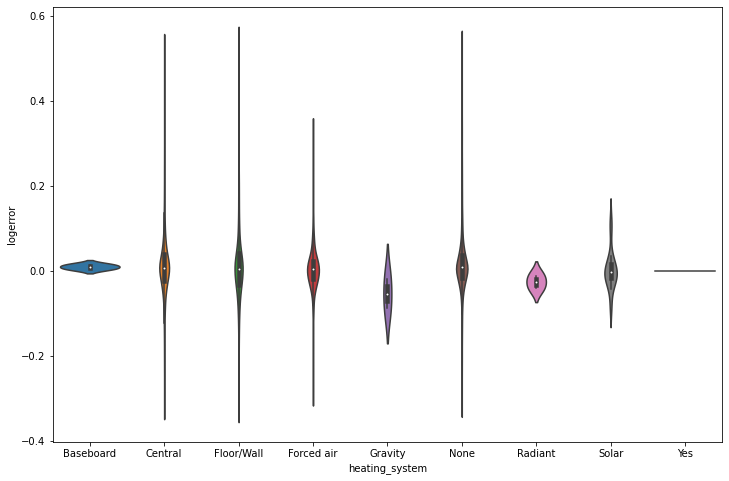

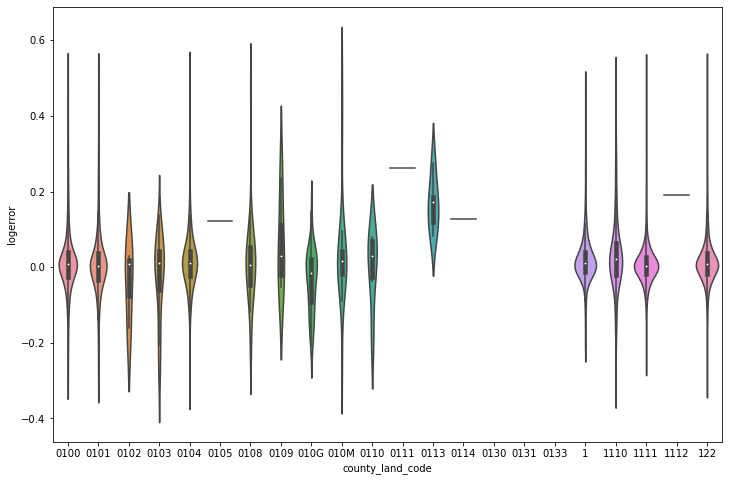

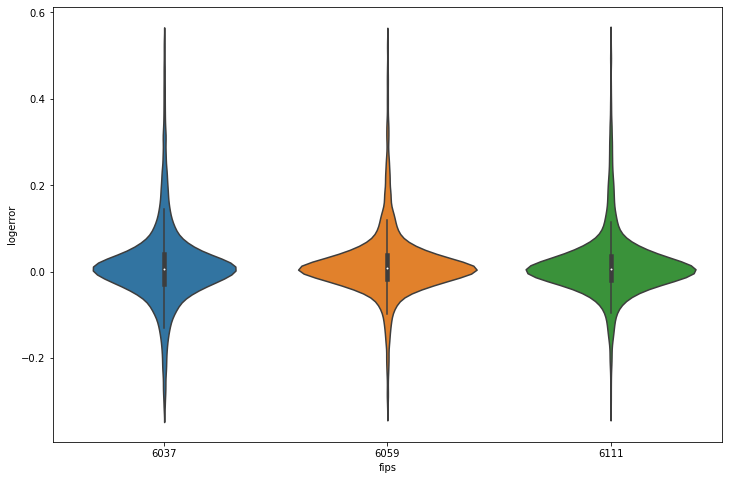

In [135]:
for col in categorical_columns:
    plt.figure(figsize=(12,8))
    sns.violinplot(x=train[col], y=target)
    plt.show()

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [63]:
df1.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb